# Thư viện

In [1]:
!pip3 install numpy
!pip3 install matplotlib
!pip3 install opencv-python

You should consider upgrading via the '/Users/levanduy/Downloads/project2_Nhom10/venv/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/levanduy/Downloads/project2_Nhom10/venv/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/levanduy/Downloads/project2_Nhom10/venv/bin/python3.8 -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Hình đầu tiên (a) là ảnh quét xương gốc.

In [1]:
img = cv2.imread("img/xray.jpg", cv2.IMREAD_GRAYSCALE)
plt.title("Ảnh gốc (a)")
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

NameError: name 'cv2' is not defined

# Bước 1: Laplacian filter

#### Một bộ lọc Laplacian được áp dụng cho ảnh gốc, tạo ra phiên bản phát hiện cạnh của hình ảnh (b). Bộ lọc này giúp làm nổi bật những khu vực có sự thay đổi cường độ nhanh, giúp nhấn mạnh các đường biên của ảnh.

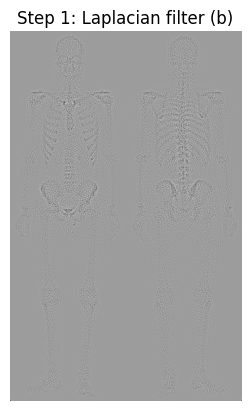

In [4]:
s1_img = cv2.Laplacian(img, cv2.CV_64F)
plt.imshow(s1_img, cmap='gray')
plt.title("Step 1: Laplacian filter (b)")
plt.axis('off')
plt.show()

# Bước 2: Sharpned version

#### Ảnh gốc (a) được làm sắc nét bằng cách trừ đi ảnh đã qua bộ lọc Laplacian (b). Kết quả là một phiên bản ảnh quét xương sắc nét hơn và rõ hơn (c).

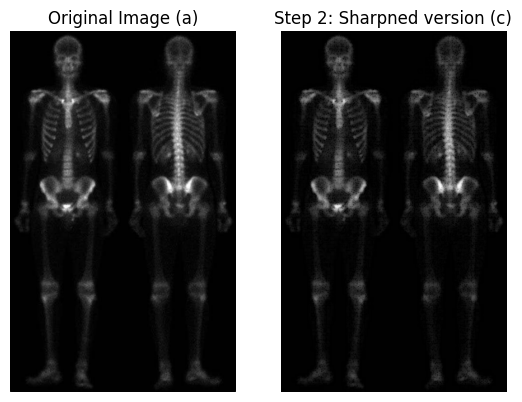

In [5]:
s2_img = cv2.subtract(img, cv2.convertScaleAbs(s1_img))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image (a)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(s2_img, cmap='gray')
plt.title("Step 2: Sharpned version (c)")
plt.axis('off')
plt.show()

# Step 3: Sobel filter

#### Bộ lọc Sobel được áp dụng cho ảnh đã làm sắc nét (c) để tiếp tục tăng cường các cạnh và những thay đổi cường độ theo hướng nhất định. Điều này tạo ra hình ảnh (d), giúp làm nổi bật thêm cấu trúc xương.

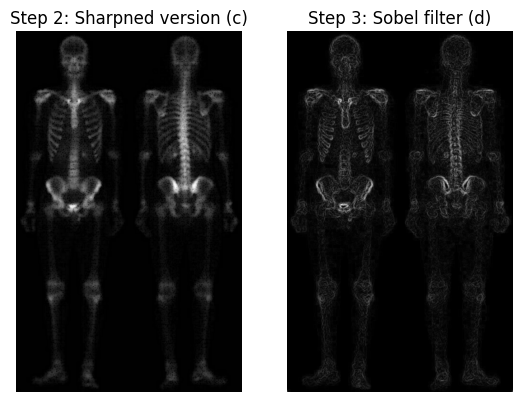

In [6]:
# Sobel cho trục x và y
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize = 3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize = 3)
# Kết hợp theo trục x và y
s3_img = cv2.magnitude(sobel_x, sobel_y)

plt.subplot(1, 2, 1)
plt.imshow(s2_img, cmap='gray')
plt.title("Step 2: Sharpned version (c)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(s3_img, cmap='gray')
plt.title("Step 3: Sobel filter (d)")
plt.axis('off')
plt.show()

# Bước 4: Smoothed with 5x5

#### Ảnh (d) được làm mượt bằng cách sử dụng bộ lọc Mean, Median và Gaussian 5x5, tạo ra ảnh (e). Bộ lọc này giúp giảm nhiễu nhưng vẫn giữ được những chi tiết quan trọng của ảnh.

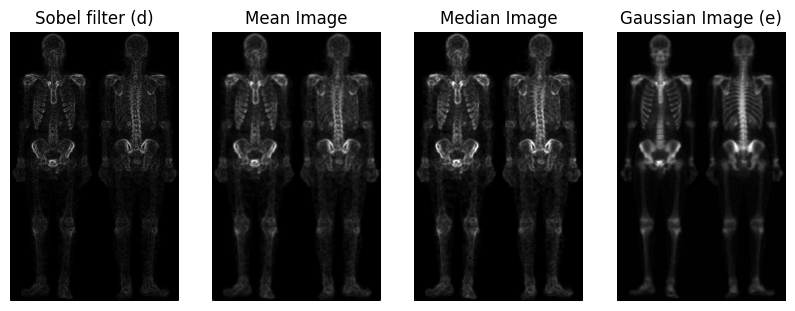

In [7]:
# Tiến hành làm mượt ảnh với những cách khác nhau để chọn ra cách tối ưu nhất
# Lọc trung bình
meanImg = cv2.blur(s3_img, (5, 5))
medianImg = cv2.medianBlur(cv2.convertScaleAbs(s3_img), 5)  # Lọc này không nhận số âm nên phải dùng abs
gaussianImg = cv2.GaussianBlur(img, (5, 5), 1)  # sigma x = 1

plt.figure(figsize=(10, 10))
plt.subplot(141)
plt.title("Sobel filter (d)")
plt.axis('off')
plt.imshow(s3_img, cmap='gray')

plt.subplot(142)
plt.title("Mean Image")
plt.axis('off')
plt.imshow(meanImg, cmap='gray')

plt.subplot(143)
plt.title("Median Image")
plt.axis('off')
plt.imshow(medianImg, cmap='gray')

plt.subplot(144)
plt.title("Gaussian Image (e)")
plt.axis('off')
plt.imshow(gaussianImg, cmap='gray')
plt.show()

In [8]:
# Nhận thấy gaussian filter cho ra kết quả tốt nhất
s4_img = gaussianImg

# Step 5: Product (c) and (e)

#### Kết quả của việc nhân hình ảnh sắc nét (c) với hình ảnh đã làm mượt (e) tạo ra ảnh (f). Kết quả là một ảnh được tăng cường cả về độ sắc nét lẫn sự mượt mà, giúp cải thiện độ rõ nét tổng thể.

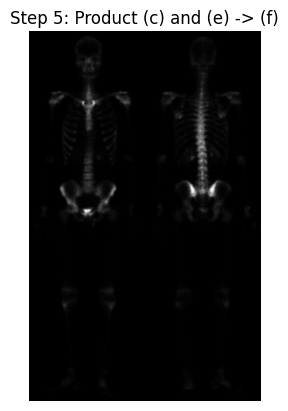

In [9]:
s5_img = cv2.multiply(s2_img.astype(np.float64), s4_img.astype(np.float64))
plt.imshow(s5_img, cmap='gray')
plt.title("Step 5: Product (c) and (e) -> (f)") 
plt.axis('off')
plt.show()

# Step 6: Sum (a) and (f)

#### Ảnh gốc (a) được cộng với ảnh (f) để tạo ra ảnh (g). Kết quả là một ảnh có độ sáng tốt hơn, giúp làm nổi bật các chi tiết quan trọng của ảnh.

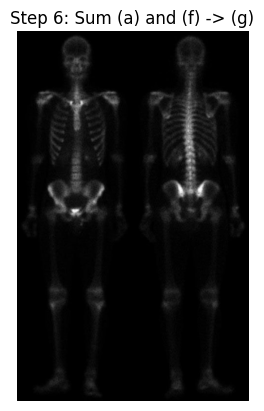

In [10]:
#Chuẩn hóa ảnh (f) để tránh vượt ngưỡng giá trị 0 - 255
f_normalize = cv2.normalize(s5_img, None, 0, 255, cv2.NORM_MINMAX)
#Trọng số ảnh 
alpha = 0.5 #ảnh a
beta = 0.5 #ảnh f
s6_img = cv2.addWeighted(img.astype(np.float64),alpha , f_normalize.astype(np.float64),beta,0)
plt.imshow(s6_img, cmap='gray')
plt.title("Step 6: Sum (a) and (f) -> (g)") 
plt.axis('off')
plt.show()

# Step 7: Power-law

#### Cuối cùng, ảnh (f) được áp dụng phép biến đổi theo lũy thừa (còn gọi là hiệu chỉnh gamma), tạo ra ảnh (h). Phép biến đổi này giúp điều chỉnh độ sáng và độ tương phản của ảnh, làm cho chi tiết ảnh rõ ràng và dễ nhìn hơn.

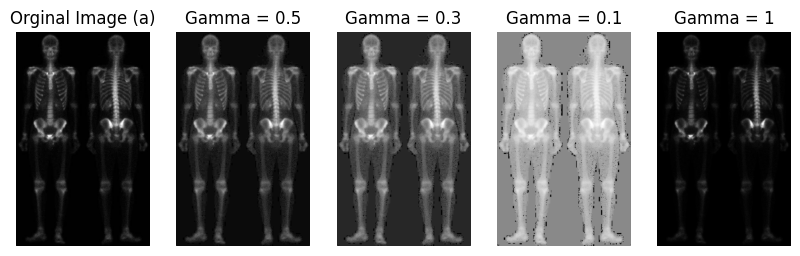

In [29]:
# Đặt c và gamma
c = 1
gamma = 0.5
gamma_1 = 0.3
gamma_2 = 0.1
gamma_3 = 1

# Áp dụng power-law
s7_img = c * (s6_img**gamma)

s7_img_1 = c * (s6_img**gamma_1)

s7_img_2 = c * (s6_img**gamma_2)

s7_img_3 = c * (s6_img**gamma_3)

plt.figure(figsize=(10,10))

plt.subplot(1, 5, 1)
plt.imshow(img, cmap='gray')
plt.title("Orginal Image (a)")
plt.axis('off')

plt.subplot(1, 5, 2)
plt.imshow(s7_img, cmap='gray')
plt.title("Gamma = 0.5") 
plt.axis('off')

plt.subplot(1, 5, 3)
plt.imshow(s7_img_1, cmap='gray')
plt.title("Gamma = 0.3")
plt.axis('off')

plt.subplot(1, 5, 4)
plt.imshow(s7_img_2, cmap='gray')
plt.title("Gamma = 0.1")
plt.axis('off')

plt.subplot(1, 5, 5)
plt.imshow(s7_img_3, cmap='gray')
plt.title("Gamma = 1")
plt.axis('off')

plt.show()

# Result

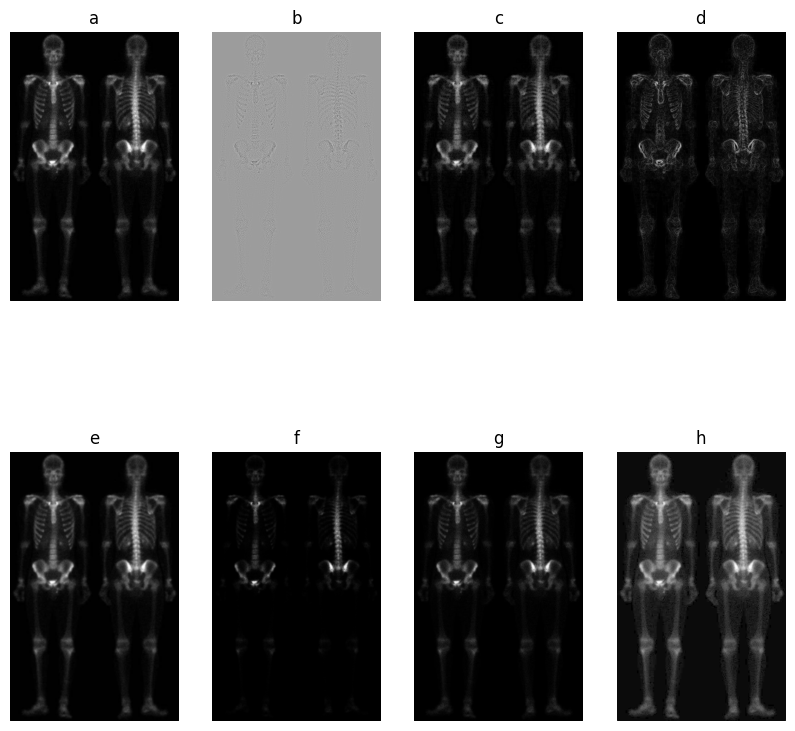

In [12]:
plt.figure(figsize=(10,10))
plt.subplot(241); plt.title("a"); plt.axis('off'); plt.imshow(img, cmap='gray')
plt.subplot(242); plt.title("b"); plt.axis('off'); plt.imshow(s1_img, cmap='gray')
plt.subplot(243); plt.title("c"); plt.axis('off'); plt.imshow(s2_img, cmap='gray')
plt.subplot(244); plt.title("d"); plt.axis('off'); plt.imshow(s3_img, cmap='gray')
plt.subplot(245); plt.title("e"); plt.axis('off'); plt.imshow(s4_img, cmap='gray')
plt.subplot(246); plt.title("f"); plt.axis('off'); plt.imshow(s5_img, cmap='gray')
plt.subplot(247); plt.title("g"); plt.axis('off'); plt.imshow(s6_img, cmap='gray')
plt.subplot(248); plt.title("h"); plt.axis('off'); plt.imshow(s7_img, cmap='gray')
plt.show()